

---


**Student Name:** Raiyan Gani

**Student ID:** 2021-2-60-120

**Course:** CSE366 (3)

**Faculty initial:** MRAR

---



#**Assignment 2**


**Objective:** The goal of this assignment is to develop and implement a Genetic Algorithm (GA) to optimize the
assignment of multiple robots to a set of tasks in a dynamic production environment. Your primary
objectives are to minimize the total production time, ensure a balanced workload across robots, and
prioritize critical tasks effectively. Additionally, you will create a detailed visualization to illustrate the final
task assignments, robot efficiencies, and task priorities.

Best solution: [5 4 2 4 2 2 1 1 3 3]


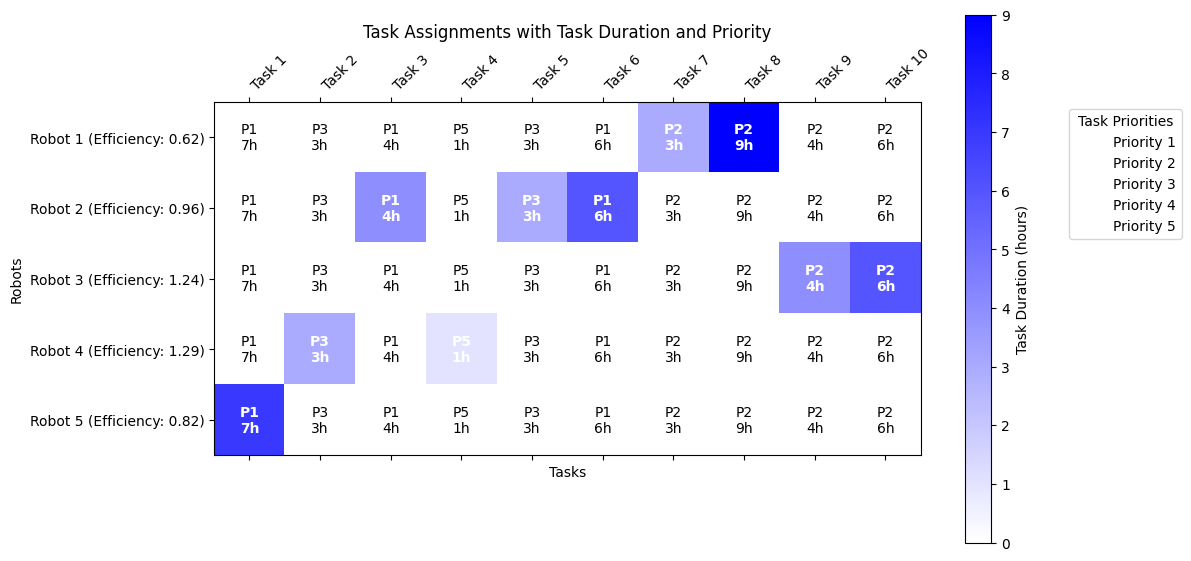

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

def initialize_population(population_size, num_tasks, num_robots):
    return np.random.randint(num_robots, size=(population_size, num_tasks))

def total_production_time(tasks, priorities, efficiencies):
    total_time_per_robot = []
    for robot in range(len(efficiencies)):
        total_time = 0
        for task, priority in zip(tasks, priorities):
            total_time += (task * priority) / efficiencies[robot] #Tr = sum{n∈tasks(r)}((duration of task n*priority weight of task n)/efficiency of robot r)

        total_time_per_robot.append(total_time)
    return max(total_time_per_robot) #Ttotal = max (T1, T2, ... , TR)

def workload_balance(total_times):
    return np.std(total_times) #B=σ(T1,T2,...,TR)

def fitness_function(tasks, priorities, efficiencies, solution):
    Ttotal = total_production_time(tasks, priorities, efficiencies)
    B = workload_balance([Ttotal])  # Pass a list to np.std
    F = Ttotal + B
    return F

def tournament_selection(population, fitness_values, tournament_size):
    selected_parents = []
    num_individuals = len(population)
    for _ in range(num_individuals):
        tournament_indices = np.random.choice(num_individuals, size=tournament_size, replace=False)
        tournament_fitness = fitness_values[tournament_indices]
        winner_idx = np.argmax(tournament_fitness)
        selected_parents.append(population[tournament_indices[winner_idx]])
    return np.array(selected_parents)

def crossover(parents, population_size):
    offsprings = []
    for _ in range(population_size):
        parent1_idx = np.random.randint(len(parents))
        parent2_idx = np.random.randint(len(parents))
        crossover_point = np.random.randint(1, len(parents[0]))
        offspring = np.concatenate((parents[parent1_idx][:crossover_point], parents[parent2_idx][crossover_point:]))
        offsprings.append(offspring)
    return np.array(offsprings)

def mutation(offspring_population, mutation_rate, num_robots):
    for offspring in offspring_population:
        for idx in range(len(offspring)):
            if np.random.rand() < mutation_rate:
                offspring[idx] = np.random.randint(num_robots)
    return offspring_population

def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies, population_size, num_generations, mutation_rate, tournament_size):
    num_tasks = len(task_durations)
    num_robots = len(robot_efficiencies)
    population = initialize_population(population_size, num_tasks, num_robots)
    best_solution = None
    best_fitness = float('inf')
    for generation in range(num_generations):
        fitness_values = np.array([fitness_function(task_durations, task_priorities, robot_efficiencies, solution) for solution in population])
        if min(fitness_values) < best_fitness:
            best_solution = population[np.argmin(fitness_values)]
            best_fitness = min(fitness_values)
        selected_parents = tournament_selection(population, fitness_values, tournament_size)
        offsprings = crossover(selected_parents, population_size)
        offsprings = mutation(offsprings, mutation_rate, num_robots)
        population = offsprings
    return best_solution

def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies, best_solution=None):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)), dtype=float)  # Initialize with float dtype

    # Create a list to store the priority values for each task
    task_priority_values = [task_priorities[task_idx] for task_idx in range(len(task_durations))]

    for task_idx, robot_idx in enumerate(solution):
        # Store duration in grid
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # Custom colormap

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            cell_content = grid[i, j]
            if cell_content != 0:
                duration = int(cell_content)
                annotation = f'P{task_priority_values[j]}\n{duration}h'  # Use the same priority value for the entire column
                if best_solution is not None and (i, j) == (best_solution[j], j):
                    ax.text(j, i, annotation, ha='center', va='center', color='white', fontweight='bold')
                else:
                    ax.text(j, i, annotation, ha='center', va='center', color='black')
            else:
                # Annotate empty cells with corresponding priority and duration
                empty_duration = task_durations[j]
                empty_annotation = f'P{task_priority_values[j]}\n{empty_duration}h'  # Use the same priority value for the entire column
                ax.text(j, i, empty_annotation, ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()


# Example usage
num_tasks = 10
num_robots = 5
task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
population_size = 100
num_generations = 1000
mutation_rate = 0.05
tournament_size = 5

best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies, population_size, num_generations, mutation_rate, tournament_size)
print("Best solution:", best_solution+1)

visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies, best_solution)

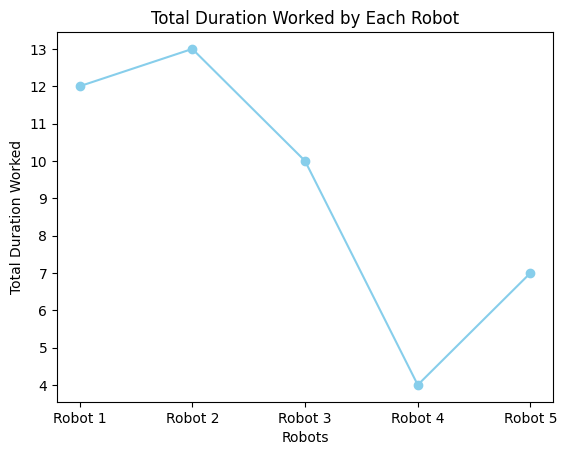

In [ ]:

def visualize_robot_work(robot_efficiencies, task_durations, best_solution):
    # Calculate total duration worked by each robot
    total_duration_per_robot = np.zeros(len(robot_efficiencies))
    for task_idx, robot_idx in enumerate(best_solution):
        total_duration_per_robot[robot_idx] += task_durations[task_idx]

    # Plotting
    fig, ax = plt.subplots()
    robots = np.arange(len(robot_efficiencies))
    ax.plot(robots, total_duration_per_robot, marker='o', color='skyblue', linestyle='-')
    ax.set_xlabel('Robots')
    ax.set_ylabel('Total Duration Worked')
    ax.set_title('Total Duration Worked by Each Robot')
    ax.set_xticks(robots)
    ax.set_xticklabels([f'Robot {i+1}' for i in range(len(robot_efficiencies))])

    # Set y-axis ticks to display whole numbers
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.show()

# Example usage
visualize_robot_work(robot_efficiencies, task_durations, best_solution)